In [1]:
! pip install geopandas

     |████████████████████████████████| 972kB 4.9MB/s 
     |████████████████████████████████| 6.5MB 18.1MB/s 
     |████████████████████████████████| 14.8MB 300kB/s 


In [2]:
import geopandas as gpd

In [3]:
volc_impact = gpd.read_file("volc_imp.shp")
crater_database = gpd.read_file("crater_database_projected.shp")

In [ ]:
volc_impact.head()

In [ ]:
crater_database.head()

In [5]:
# put the two shapefiles together in a dataframe
import pandas as pd
gdf = pd.concat([volc_impact, crater_database], join="outer")

In [7]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf.head(1)

In [9]:
! pip install rasterio

     |████████████████████████████████| 18.3MB 243kB/s 


In [10]:
! pip install rasterstats

     |████████████████████████████████| 133kB 7.2MB/s 


In [11]:
# calculate zonal stats from the raster

import rasterio
from rasterstats import zonal_stats

with rasterio.open("GlobalColor2017_equi_64ppd.PC2.PC1.430over1000.png") as src:
    affine = src.transform
    array = src.read(1)
    df_zonal_stats = pd.DataFrame(zonal_stats(gdf, array, stats=['mean', 'median', 'std', 'count'], affine=affine))

    df_zonal_stats = df_zonal_stats.rename(columns={'mean': 'mean1', 'median': 'median1', 'std': 'std1','count': 'count1'})

    df_zonal_stats.reset_index(drop=True, inplace=True)
    gdf.reset_index(drop=True, inplace=True)

    # adding statistics back to original GeoDataFrame
    gdf_zonal = pd.concat([gdf, df_zonal_stats], axis=1) 

    array = src.read(2)
    df_zonal_stats = pd.DataFrame(zonal_stats(gdf, array, stats=['mean', 'median', 'std', 'count'], affine=affine))

    df_zonal_stats = df_zonal_stats.rename(columns={'mean': 'mean2', 'median': 'median2', 'std': 'std2','count': 'count2'})

    df_zonal_stats.reset_index(drop=True, inplace=True)
    gdf.reset_index(drop=True, inplace=True)

    # adding statistics back to original GeoDataFrame
    gdf_zonal = pd.concat([gdf_zonal, df_zonal_stats], axis=1) 

    array = src.read(3)
    df_zonal_stats = pd.DataFrame(zonal_stats(gdf, array, stats=['mean', 'median', 'std', 'count'], affine=affine))

    df_zonal_stats = df_zonal_stats.rename(columns={'mean': 'mean3', 'median': 'median3', 'std': 'std3','count': 'count3'})

    df_zonal_stats.reset_index(drop=True, inplace=True)
    gdf.reset_index(drop=True, inplace=True)

    # adding statistics back to original GeoDataFrame
    gdf_zonal = pd.concat([gdf_zonal, df_zonal_stats], axis=1) 

/usr/local/lib/python3.6/dist-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [ ]:
gdf_zonal.head()

In [ ]:
gdf_zonal.to_file('creighter.shp')

In [ ]:
# spatial join of crater database and chosen areas to include age and diameter

In [ ]:
# spatial join based on centriods of shp files and then nearest pt

In [ ]:
"""
Compare volcanic spectral reflectance to location from N to S and W to E
Compare v spec reflectance to area/diameter
Compare v spec reflectance to age (crater degradation)
"""

In [13]:
gdf_zonal['quad'] = ''

In [14]:
gdf_zonal.loc[(gdf_zonal['CENTROID_Y'] > 0) & (gdf_zonal['CENTROID_X'] > 0), 'quad'] = 'NE'

gdf_zonal.loc[(gdf_zonal['CENTROID_Y'] > 0) & (gdf_zonal['CENTROID_X'] <= 0), 'quad'] = 'NW'

gdf_zonal.loc[(gdf_zonal['CENTROID_Y'] <= 0) & (gdf_zonal['CENTROID_X'] > 0), 'quad'] = 'SE'

gdf_zonal.loc[(gdf_zonal['CENTROID_Y'] <= 0) & (gdf_zonal['CENTROID_X'] <= 0), 'quad'] = 'SW'



In [15]:
gdf_zonal['type']=''

In [ ]:
gdf_zonal.loc[(gdf_zonal['Volcanic'] == 0)), 'type'] = 'Volcanic'

## Volcanic Figs

North to South

Text(0.5, 1.0, 'Volcanic Spectral Reflectance Moving South to North')

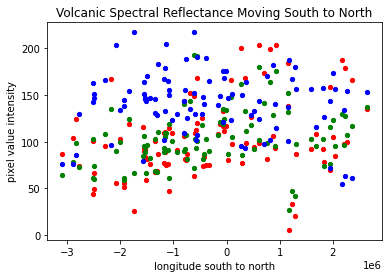

In [21]:
import matplotlib.pyplot as plt
# Compare volcanic spectral reflectance to location from N to S and W to E
volc = gdf_zonal[gdf_zonal['Volcanic'] == 1]
fig,ax = plt.subplots()

ax.scatter(volc['CENTROID_Y'], volc['mean1'], color='red', s=18)
ax.scatter(volc['CENTROID_Y'], volc['mean2'], color='green', s=18)
ax.scatter(volc['CENTROID_Y'], volc['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('longitude south to north')

ax.set_title('Volcanic Spectral Reflectance Moving South to North')

#

#change x's to y's and switch north and south verbally

Text(0.5, 1.0, 'Volcanic Spectral Reflectance Moving South to North')

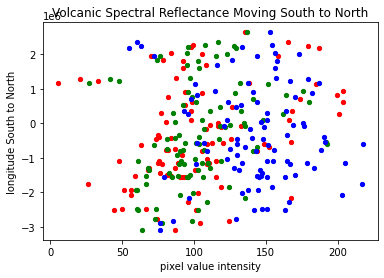

In [22]:
#axes flipped
fig,ax = plt.subplots()

ax.scatter(volc['mean1'], volc['CENTROID_Y'], color='red', s=18)
ax.scatter(volc['mean2'], volc['CENTROID_Y'], color='green', s=18)
ax.scatter(volc['mean3'], volc['CENTROID_Y'], color='blue', s=18)

ax.set_ylabel('longitude South to North')
ax.set_xlabel('pixel value intensity')

ax.set_title('Volcanic Spectral Reflectance Moving South to North')


y=0.000009x+(106.372712)
y=0.000006x+(105.432635)
y=-0.000003x+(140.338262)


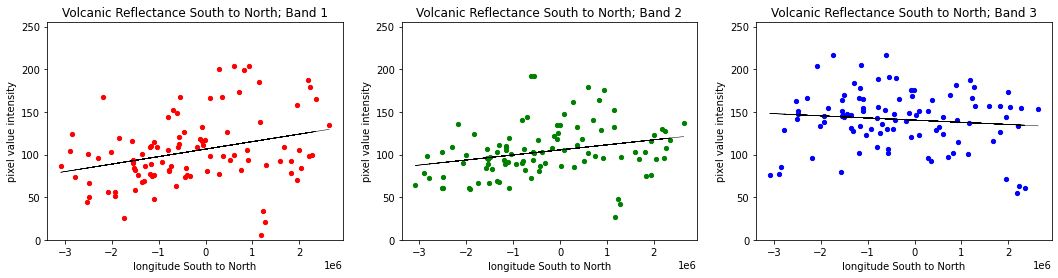

In [23]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(volc['CENTROID_Y'], volc['mean1'], color='red', s=18)
ax[1].scatter(volc['CENTROID_Y'], volc['mean2'], color='green', s=18)
ax[2].scatter(volc['CENTROID_Y'], volc['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('longitude South to North')
ax[0].set_title('Volcanic Reflectance South to North; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('longitude South to North')
ax[1].set_title('Volcanic Reflectance South to North; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('longitude South to North')
ax[2].set_title('Volcanic Reflectance South to North; Band 3')


z = np.polyfit(volc['CENTROID_Y'], volc['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(volc['CENTROID_Y'],p(volc['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['CENTROID_Y'], volc['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(volc['CENTROID_Y'],p(volc['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['CENTROID_Y'], volc['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(volc['CENTROID_Y'],p(volc['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('volc3_long.png',dpi=300)

West to East

Text(0.5, 1.0, 'Volcanic Reflectance Moving West to East')

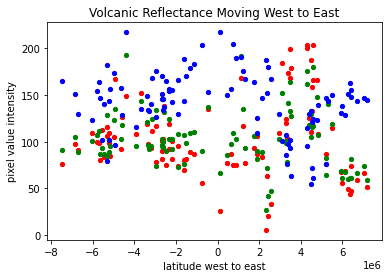

In [24]:
fig,ax = plt.subplots()

ax.scatter(volc['CENTROID_X'], volc['mean1'], color='red', s=18)
ax.scatter(volc['CENTROID_X'], volc['mean2'], color='green', s=18)
ax.scatter(volc['CENTROID_X'], volc['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('latitude west to east')
ax.set_title('Volcanic Reflectance Moving West to East')

#fig.savefig('volc_lat_all.png',dpi=300)

y=0.000000x+(103.411852)
y=-0.000001x+(103.597997)
y=-0.000002x+(141.469408)


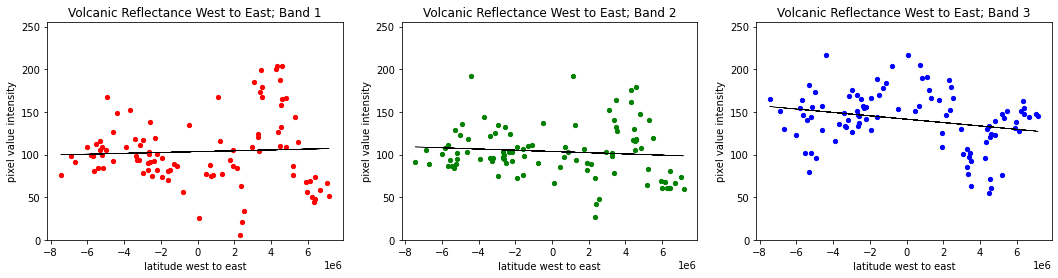

In [25]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(volc['CENTROID_X'], volc['mean1'], color='red', s=18)
ax[1].scatter(volc['CENTROID_X'], volc['mean2'], color='green', s=18)
ax[2].scatter(volc['CENTROID_X'], volc['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('latitude west to east')
ax[0].set_title('Volcanic Reflectance West to East; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('latitude west to east')
ax[1].set_title('Volcanic Reflectance West to East; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('latitude west to east')
ax[2].set_title('Volcanic Reflectance West to East; Band 3')


z = np.polyfit(volc['CENTROID_X'], volc['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(volc['CENTROID_X'],p(volc['CENTROID_X']),"k", lw=.5)


print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['CENTROID_X'], volc['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(volc['CENTROID_X'],p(volc['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['CENTROID_X'], volc['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(volc['CENTROID_X'],p(volc['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('volc_lat_3.png',dpi=300)

Text(0.5, 1.0, 'Volcanic Reflectance vs. Location; Band 3')

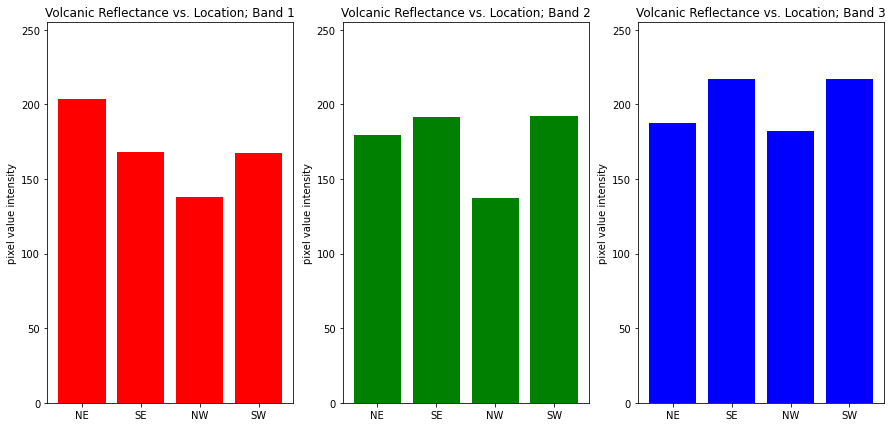

In [26]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(volc['quad'], volc['mean1'], color='red')
ax[1].bar(volc['quad'], volc['mean2'], color='green')
ax[2].bar(volc['quad'], volc['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_title('Volcanic Reflectance vs. Location; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_title('Volcanic Reflectance vs. Location; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_title('Volcanic Reflectance vs. Location; Band 3')

#fig.savefig('volc_quadrants.png',dpi=300)


Text(0.5, 1.0, 'Volcanic Reflectance vs. Location; Band 3')

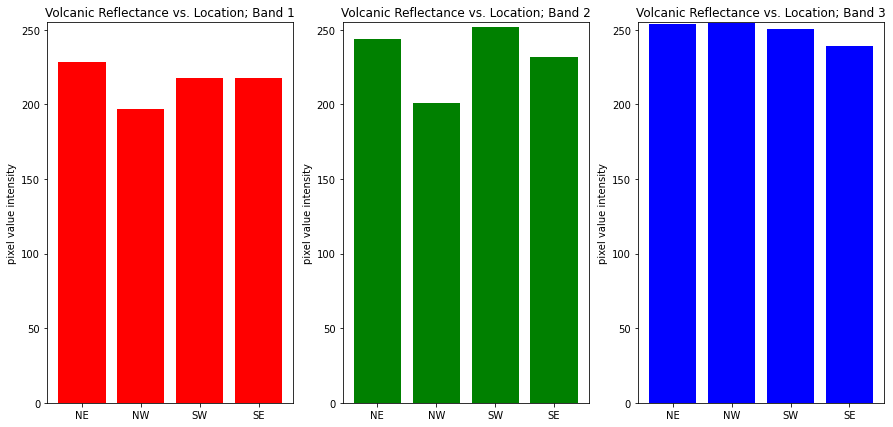

In [27]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(gdf_zonal['quad'], gdf_zonal['mean1'], color='red')
ax[1].bar(gdf_zonal['quad'], gdf_zonal['mean2'], color='green')
ax[2].bar(gdf_zonal['quad'], gdf_zonal['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_title('Volcanic Reflectance vs. Location; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_title('Volcanic Reflectance vs. Location; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_title('Volcanic Reflectance vs. Location; Band 3')

#fig.savefig('volc_quadrants.png',dpi=300)

3D Visualizations


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Scatter3D   [x,y,z]
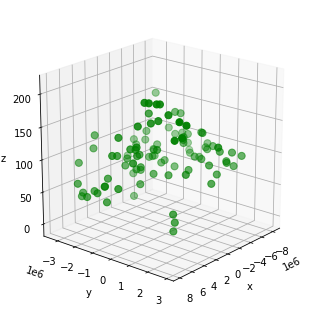

In [28]:
import holoviews as hv
from holoviews import dim, opts
import numpy as np

hv.extension('matplotlib')

hv.Scatter3D((volc['CENTROID_X'], volc['CENTROID_Y'], volc['mean1'])).opts(opts.Scatter3D(azimuth=40, elevation=20, c='green', s=50))



In [29]:
import plotly.express as px
fig = px.scatter_3d(volc, x='CENTROID_X', y='CENTROID_Y', z='mean1')
fig.show()

Diameter

Text(0.5, 1.0, 'Volcanic Reflectance vs. Diameter')

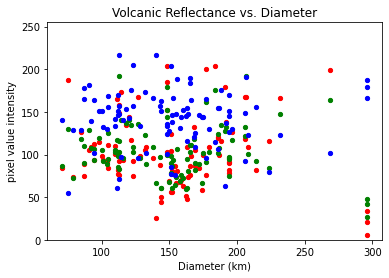

In [30]:
fig,ax = plt.subplots()

ax.scatter(volc['Diameter_k'], volc['mean1'], color='red', s=18)
ax.scatter(volc['Diameter_k'], volc['mean2'], color='green', s=18)
ax.scatter(volc['Diameter_k'], volc['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('Diameter (km)')
ax.set_title('Volcanic Reflectance vs. Diameter')

#fig.savefig('volc_diameterall.png',dpi=300)

y=-0.073892x+(114.717457)
y=-0.083063x+(116.112955)
y=0.014259x+(139.002054)


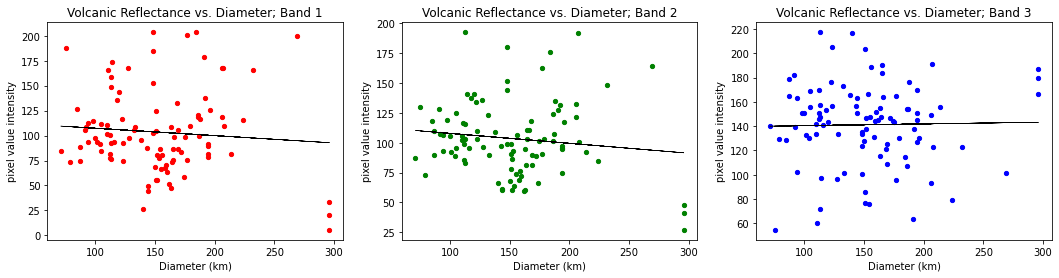

In [31]:
import numpy as np


fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(volc['Diameter_k'], volc['mean1'], color='red', s=18)
ax[1].scatter(volc['Diameter_k'], volc['mean2'], color='green', s=18)
ax[2].scatter(volc['Diameter_k'], volc['mean3'], color='blue', s=18)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Diameter (km)')
ax[0].set_title('Volcanic Reflectance vs. Diameter; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Diameter (km)')
ax[1].set_title('Volcanic Reflectance vs. Diameter; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Diameter (km)')
ax[2].set_title('Volcanic Reflectance vs. Diameter; Band 3')

# calc the trendline
z = np.polyfit(volc['Diameter_k'], volc['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(volc['Diameter_k'],p(volc['Diameter_k']),"k", lw=.5)


print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['Diameter_k'], volc['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(volc['Diameter_k'],p(volc['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(volc['Diameter_k'], volc['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(volc['Diameter_k'],p(volc['Diameter_k']),"k", lw=.5)


print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('volc_diameter3.png',dpi=300)

Age/Class


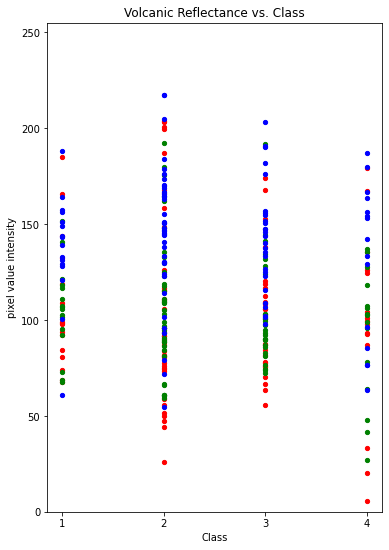

In [32]:
fig,ax = plt.subplots(figsize=(6,9))

ax.scatter(volc['Class'], volc['mean1'], color='red', s=18)
ax.scatter(volc['Class'], volc['mean2'], color='green', s=18)
ax.scatter(volc['Class'], volc['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('Class')
ax.set_title('Volcanic Reflectance vs. Class')

ax.set_xticks([1,2, 3, 4])

#fig.savefig('volc_classall.png',dpi=300)

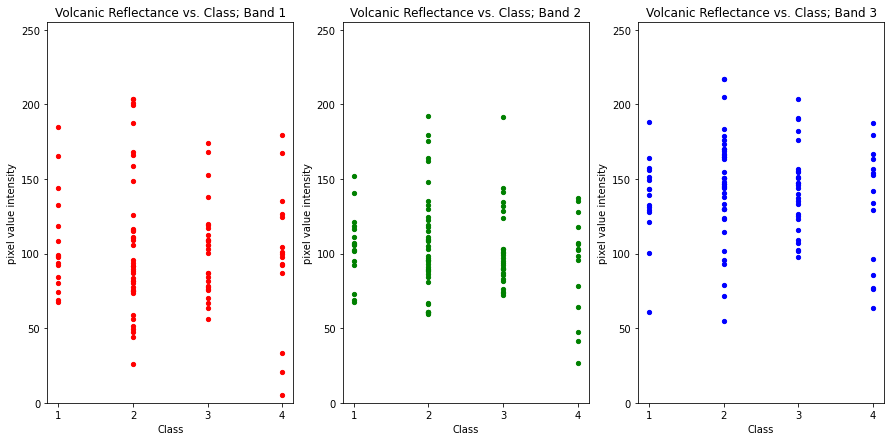

In [33]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].scatter(volc['Class'], volc['mean1'], color='red', s=18)
ax[1].scatter(volc['Class'], volc['mean2'], color='green', s=18)
ax[2].scatter(volc['Class'], volc['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('Volcanic Reflectance vs. Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('Volcanic Reflectance vs. Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('Volcanic Reflectance vs. Class; Band 3')

ax[0].set_xticks([1,2, 3, 4])
ax[1].set_xticks([1,2, 3, 4])
ax[2].set_xticks([1,2, 3, 4])

#fig.savefig('volc_class3.png',dpi=300)

Text(0.5, 1.0, 'Volcanic Reflectance vs. Class; Band 3')

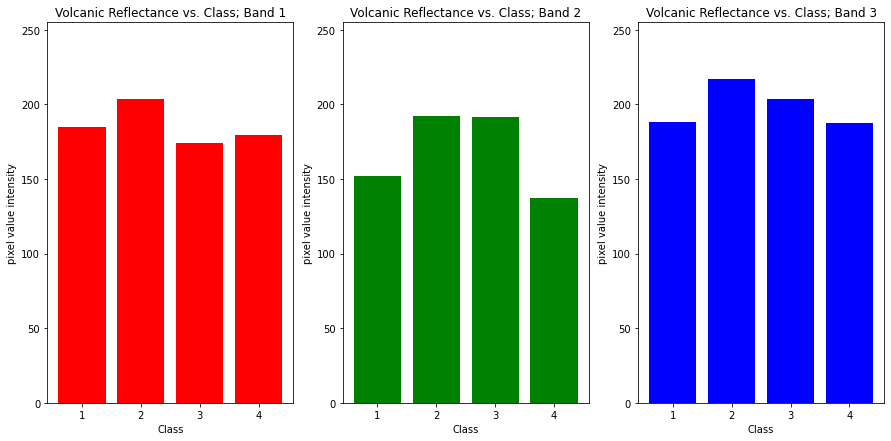

In [34]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(volc['Class'], volc['mean1'], color='red')
ax[1].bar(volc['Class'], volc['mean2'], color='green')
ax[2].bar(volc['Class'], volc['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('Volcanic Reflectance vs. Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('Volcanic Reflectance vs. Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('Volcanic Reflectance vs. Class; Band 3')

#fig.savefig('volc_classmean.png',dpi=300)

In [35]:
volc.head()

,OBJECTID_1,OBJECTID,Id,Shape_Leng,Bndry_Chk,Sph_Area,CENTROID_X,CENTROID_Y,Cen_Peak,Peak_Ring,Ghost_Crat,Notes,Infilled_L,Shape_Le_1,Shape_Area,Volcanic,Impact,ImpNonAsso,Diameter_k,Class,Area,ICPNon,geometry,Join_Count,TARGET_FID,FID_,x_coord,y_coord,Radius_k,BUFF_DIST,ORIG_FID,Embayment,NEAR_FID,ICP,mean1,count1,std1,median1,mean2,count2,std2,median2,mean3,count3,std3,median3,quad,type
1,2,6,0,546.403679,11.0,1.809931e+10,4.290974e+06,278807.100627,0,1,1,None,0,5.464037e+05,1.822033e+10,1.0,0,0.0,177.0,2,0.0,0.0,"POLYGON ((4299924.329 348333.376, 4305083.714 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.798949,41094,36.085152,203.0,162.184455,41094,36.699972,159.0,95.782839,41094,27.185732,91.0,NE,
14,16,40,0,394.544906,110.0,3.617810e+09,4.836019e+06,-171775.780367,0,0,1,None,0,3.945449e+05,3.626913e+09,1.0,0,0.0,92.0,1,0.0,0.0,"POLYGON ((4837466.133 -134073.183, 4842625.519...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.623578,8177,21.760679,106.0,107.284823,8177,20.582497,105.0,139.017977,8177,23.387475,135.0,SE,
20,22,48,0,1056.607460,11.0,2.148836e+10,4.801549e+06,85675.386992,0,0,1,two tiny ghost crates near middle? & bot left,0,1.056607e+06,2.150552e+10,1.0,0,0.0,232.0,2,0.0,0.0,"POLYGON ((4835464.115 150336.830, 4833876.612 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.039857,48473,27.315175,170.0,148.047511,48473,25.055590,148.0,123.020630,48473,24.188184,119.0,NE,
27,29,56,0,583.321182,11.0,1.635729e+10,4.584657e+06,606356.343061,0,0,0,None,1,5.833212e+05,1.687763e+10,1.0,0,0.0,148.0,2,0.0,0.0,"POLYGON ((4588766.122 677520.176, 4594719.259 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.463456,38064,27.741203,204.0,179.707493,38064,26.969094,180.0,123.837905,38064,32.702843,119.0,NE,
29,31,58,0,725.966368,110.0,1.891484e+10,4.316383e+06,931545.527204,0,1,0,what r the elevated strucs? peak ring remn? 2 sm?,0,7.259664e+05,2.038518e+10,1.0,0,0.0,184.0,2,0.0,0.0,"POLYGON ((4306812.329 1023820.764, 4309987.335...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.349041,45966,30.247880,206.0,175.750881,45966,38.075126,174.0,114.278989,45966,38.121963,108.0,NE,


# Impact Melt Craters

Text(0.5, 1.0, 'Impact Melt Spectral Reflectance Moving South to North')

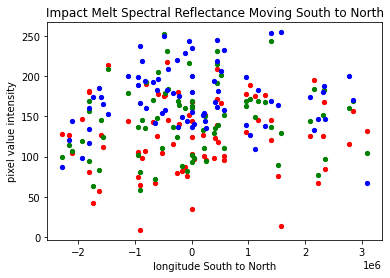

In [36]:
imp = gdf_zonal[gdf_zonal['Impact'] == 1]
fig,ax = plt.subplots()

ax.scatter(imp['CENTROID_Y'], imp['mean1'], color='red', s=18)
ax.scatter(imp['CENTROID_Y'], imp['mean2'], color='green', s=18)
ax.scatter(imp['CENTROID_Y'], imp['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('longitude South to North')

ax.set_title('Impact Melt Spectral Reflectance Moving South to North')

#fig.savefig('imp_longall.png',dpi=300)



y=0.000002x+(125.615772)
y=0.000005x+(144.426187)
y=0.000002x+(172.810614)


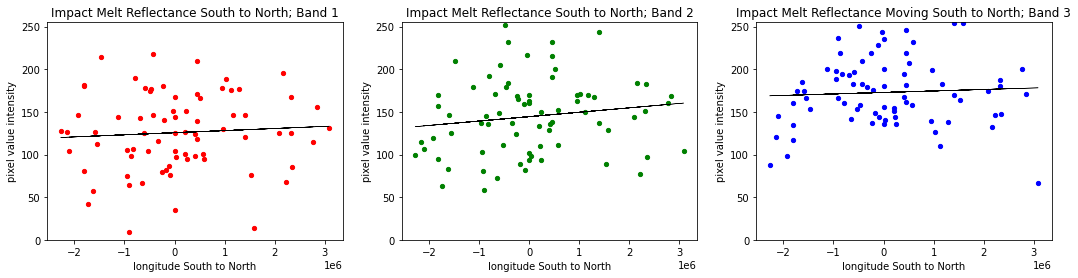

In [37]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(imp['CENTROID_Y'], imp['mean1'], color='red', s=18)
ax[1].scatter(imp['CENTROID_Y'], imp['mean2'], color='green', s=18)
ax[2].scatter(imp['CENTROID_Y'], imp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('longitude South to North')
ax[0].set_title('Impact Melt Reflectance South to North; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('longitude South to North')
ax[1].set_title('Impact Melt Reflectance South to North; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('longitude South to North')
ax[2].set_title('Impact Melt Reflectance Moving South to North; Band 3')

z = np.polyfit(imp['CENTROID_Y'], imp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(imp['CENTROID_Y'],p(imp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['CENTROID_Y'], imp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(imp['CENTROID_Y'],p(imp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['CENTROID_Y'], imp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(imp['CENTROID_Y'],p(imp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('imp_long3.png',dpi=300)

Text(0.5, 1.0, 'Impact Melt Reflectance West to East; All Bands')

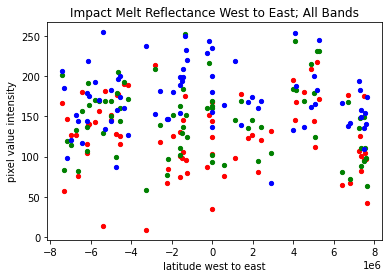

In [38]:
fig,ax = plt.subplots()

ax.scatter(imp['CENTROID_X'], imp['mean1'], color='red', s=18)
ax.scatter(imp['CENTROID_X'], imp['mean2'], color='green', s=18)
ax.scatter(imp['CENTROID_X'], imp['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('latitude west to east')
ax.set_title('Impact Melt Reflectance West to East; All Bands')


#fig.savefig('imp_latall.png',dpi=300)

y=-0.000000x+(125.632982)
y=-0.000001x+(144.515101)
y=-0.000000x+(172.799467)


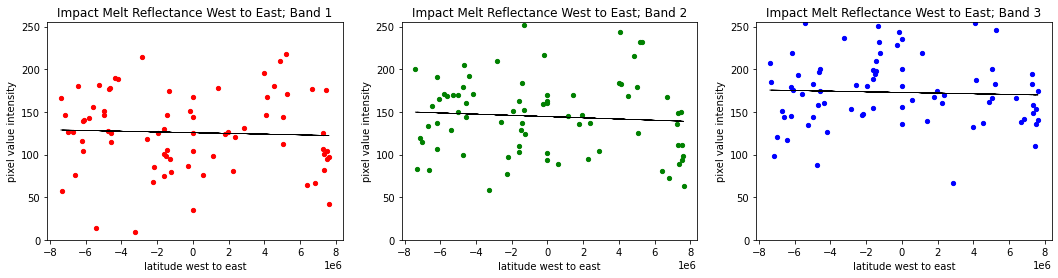

In [39]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(imp['CENTROID_X'], imp['mean1'], color='red', s=18)
ax[1].scatter(imp['CENTROID_X'], imp['mean2'], color='green', s=18)
ax[2].scatter(imp['CENTROID_X'], imp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('latitude west to east')
ax[0].set_title('Impact Melt Reflectance West to East; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('latitude west to east')
ax[1].set_title('Impact Melt Reflectance West to East; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('latitude west to east')
ax[2].set_title('Impact Melt Reflectance West to East; Band 3')

z = np.polyfit(imp['CENTROID_X'], imp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(imp['CENTROID_X'],p(imp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['CENTROID_X'], imp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(imp['CENTROID_X'],p(imp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['CENTROID_X'], imp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(imp['CENTROID_X'],p(imp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('imp_lat3.png',dpi=300)



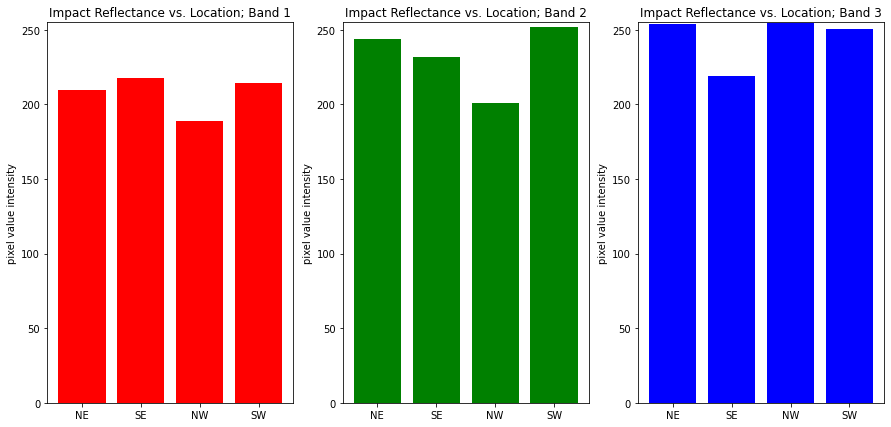

In [40]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(imp['quad'], imp['mean1'], color='red')
ax[1].bar(imp['quad'], imp['mean2'], color='green')
ax[2].bar(imp['quad'], imp['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_title('Impact Reflectance vs. Location; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_title('Impact Reflectance vs. Location; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_title('Impact Reflectance vs. Location; Band 3')

imp[imp['quad']=='']

fig.savefig('imp_quadrants.png',dpi=300)

Text(0.5, 1.0, 'Impact Melt Reflectance vs Diameter; All Bands')

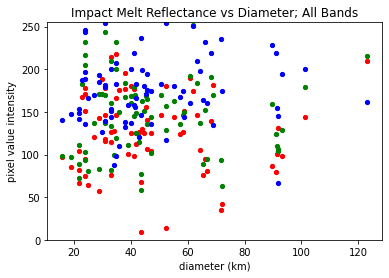

In [41]:
fig,ax = plt.subplots()

ax.scatter(imp['Diameter_k'], imp['mean1'], color='red', s=18)
ax.scatter(imp['Diameter_k'], imp['mean2'], color='green', s=18)
ax.scatter(imp['Diameter_k'], imp['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('diameter (km)')
ax.set_title('Impact Melt Reflectance vs Diameter; All Bands')

#fig.savefig('imp_diameterall.png',dpi=300)

y=-0.081525x+(129.623653)
y=0.063615x+(141.710829)
y=0.170484x+(164.830739)


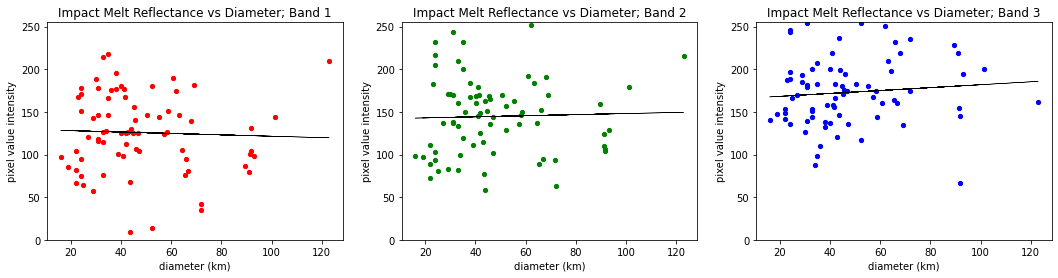

In [42]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(imp['Diameter_k'], imp['mean1'], color='red', s=18)
ax[1].scatter(imp['Diameter_k'], imp['mean2'], color='green', s=18)
ax[2].scatter(imp['Diameter_k'], imp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('diameter (km)')
ax[0].set_title('Impact Melt Reflectance vs Diameter; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('diameter (km)')
ax[1].set_title('Impact Melt Reflectance vs Diameter; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('diameter (km)')
ax[2].set_title('Impact Melt Reflectance vs Diameter; Band 3')

z = np.polyfit(imp['Diameter_k'], imp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(imp['Diameter_k'],p(imp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['Diameter_k'], imp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(imp['Diameter_k'],p(imp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(imp['Diameter_k'], imp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(imp['Diameter_k'],p(imp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('imp_diameter3.png',dpi=300)

#trendline for red green and blue?

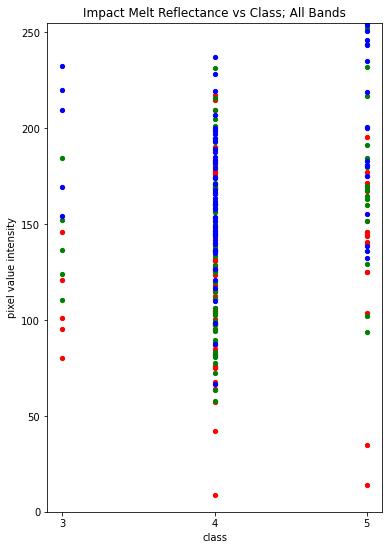

In [43]:
fig,ax = plt.subplots(figsize=(6,9))

ax.scatter(imp['Class'], imp['mean1'], color='red', s=18)
ax.scatter(imp['Class'], imp['mean2'], color='green', s=18)
ax.scatter(imp['Class'], imp['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('class')
ax.set_title('Impact Melt Reflectance vs Class; All Bands')

ax.set_xticks([3, 4, 5])

fig.savefig('imp_classall1.png',dpi=300)

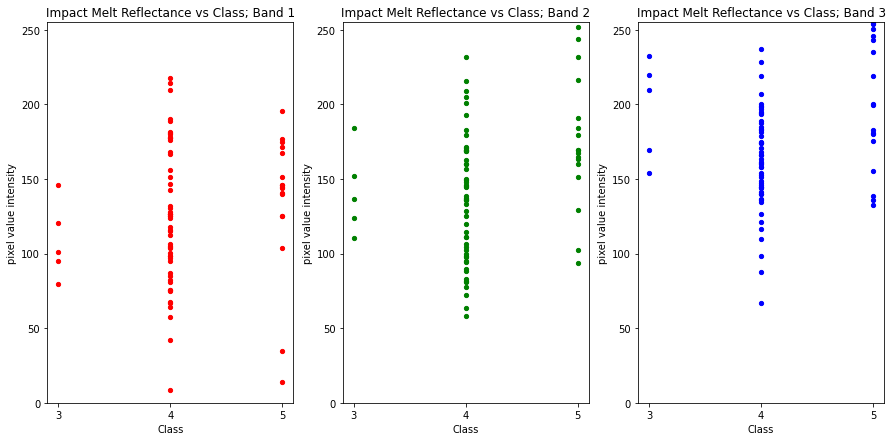

In [44]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].scatter(imp['Class'], imp['mean1'], color='red', s=18)
ax[1].scatter(imp['Class'], imp['mean2'], color='green', s=18)
ax[2].scatter(imp['Class'], imp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('Impact Melt Reflectance vs Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('Impact Melt Reflectance vs Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('Impact Melt Reflectance vs Class; Band 3')

ax[0].set_xticks([3, 4, 5])
ax[1].set_xticks([3, 4, 5])
ax[2].set_xticks([3, 4, 5])

fig.savefig('imp_class3_1.png',dpi=300)

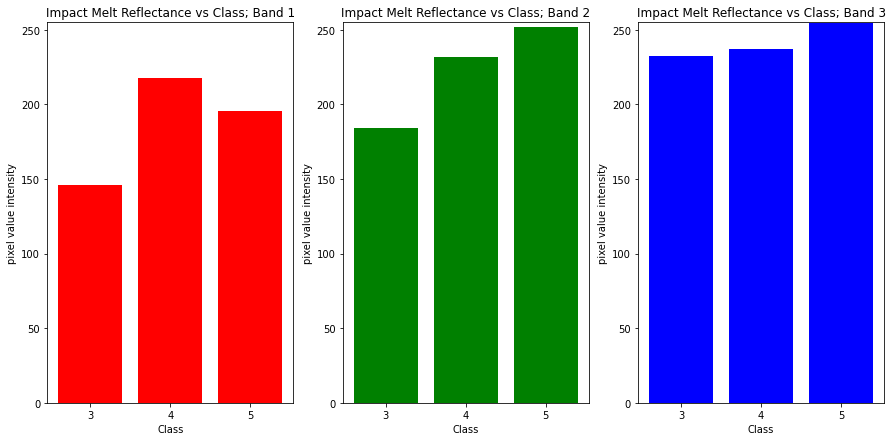

In [45]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(imp['Class'], imp['mean1'], color='red')
ax[1].bar(imp['Class'], imp['mean2'], color='green')
ax[2].bar(imp['Class'], imp['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('Impact Melt Reflectance vs Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('Impact Melt Reflectance vs Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('Impact Melt Reflectance vs Class; Band 3')

ax[0].set_xticks([3, 4, 5])
ax[1].set_xticks([3, 4, 5])
ax[2].set_xticks([3, 4, 5])

#fig.savefig('imp_classmean1.png',dpi=300)


#std bars????

# ICP Craters

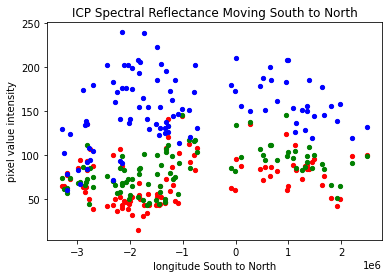

In [46]:
icp = gdf_zonal[gdf_zonal['ICP'] == 1]

fig,ax = plt.subplots()

ax.scatter(icp['CENTROID_Y'], icp['mean1'], color='red', s=18)
ax.scatter(icp['CENTROID_Y'], icp['mean2'], color='green', s=18)
ax.scatter(icp['CENTROID_Y'], icp['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('longitude South to North')
ax.set_title('ICP Spectral Reflectance Moving South to North')

fig.savefig('icp_longall.png',dpi=300)

y=0.000004x+(76.458461)
y=0.000006x+(89.139339)
y=0.000005x+(158.119435)


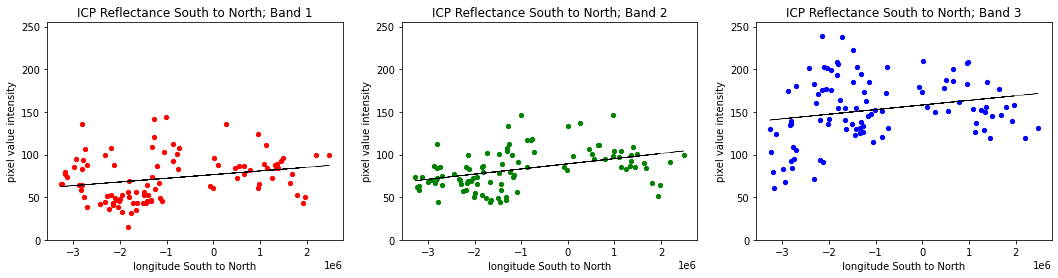

In [47]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(icp['CENTROID_Y'], icp['mean1'], color='red', s=18)
ax[1].scatter(icp['CENTROID_Y'], icp['mean2'], color='green', s=18)
ax[2].scatter(icp['CENTROID_Y'], icp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('longitude South to North')
ax[0].set_title('ICP Reflectance South to North; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('longitude South to North')
ax[1].set_title('ICP Reflectance South to North; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('longitude South to North')
ax[2].set_title('ICP Reflectance South to North; Band 3')

z = np.polyfit(icp['CENTROID_Y'], icp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(icp['CENTROID_Y'],p(icp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['CENTROID_Y'], icp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(icp['CENTROID_Y'],p(icp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['CENTROID_Y'], icp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(icp['CENTROID_Y'],p(icp['CENTROID_Y']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

fig.savefig('icp_long3.png',dpi=300)

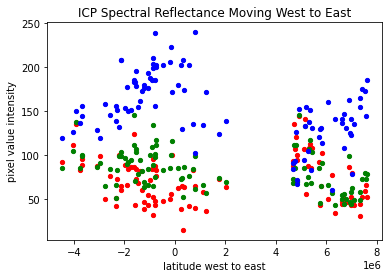

In [48]:
icp = gdf_zonal[gdf_zonal['ICP'] == 1]

fig,ax = plt.subplots()

ax.scatter(icp['CENTROID_X'], icp['mean1'], color='red', s=18)
ax.scatter(icp['CENTROID_X'], icp['mean2'], color='green', s=18)
ax.scatter(icp['CENTROID_X'], icp['mean3'], color='blue', s=18)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('latitude west to east')
ax.set_title('ICP Spectral Reflectance Moving West to East')

fig.savefig('icp_latall.png',dpi=300)

y=-0.000001x+(73.042891)
y=-0.000002x+(87.330687)
y=-0.000004x+(160.269191)


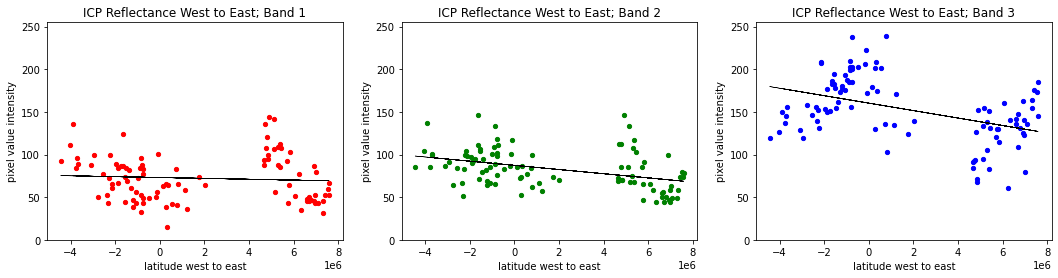

In [49]:
icp = gdf_zonal[gdf_zonal['ICP'] == 1]

fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(icp['CENTROID_X'], icp['mean1'], color='red', s=18)
ax[1].scatter(icp['CENTROID_X'], icp['mean2'], color='green', s=18)
ax[2].scatter(icp['CENTROID_X'], icp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('latitude west to east')
ax[0].set_title('ICP Reflectance West to East; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('latitude west to east')
ax[1].set_title('ICP Reflectance West to East; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('latitude west to east')
ax[2].set_title('ICP Reflectance West to East; Band 3')

z = np.polyfit(icp['CENTROID_X'], icp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(icp['CENTROID_X'],p(icp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['CENTROID_X'], icp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(icp['CENTROID_X'],p(icp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['CENTROID_X'], icp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(icp['CENTROID_X'],p(icp['CENTROID_X']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

fig.savefig('icp_lat3.png',dpi=300)

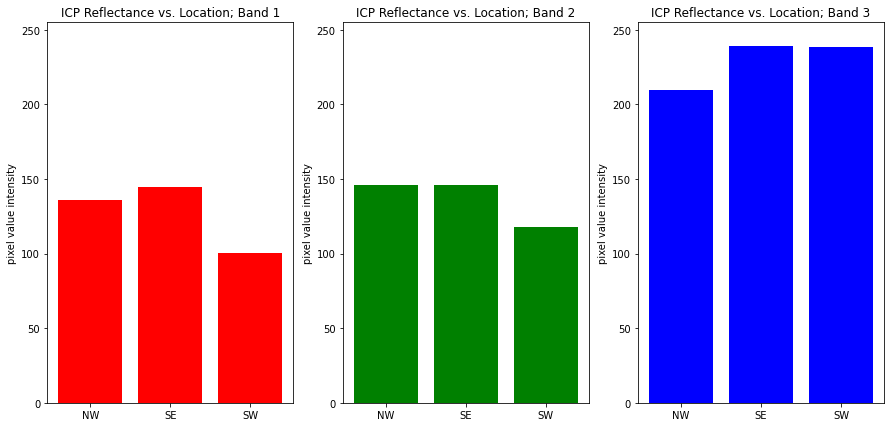

In [50]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(icp['quad'], icp['mean1'], color='red')
ax[1].bar(icp['quad'], icp['mean2'], color='green')
ax[2].bar(icp['quad'], icp['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_title('ICP Reflectance vs. Location; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_title('ICP Reflectance vs. Location; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_title('ICP Reflectance vs. Location; Band 3')

icp[icp['quad']=='']

fig.savefig('icp_quadrants2.png',dpi=300)

In [51]:
icp[icp['quad']=='']

,OBJECTID_1,OBJECTID,Id,Shape_Leng,Bndry_Chk,Sph_Area,CENTROID_X,CENTROID_Y,Cen_Peak,Peak_Ring,Ghost_Crat,Notes,Infilled_L,Shape_Le_1,Shape_Area,Volcanic,Impact,ImpNonAsso,Diameter_k,Class,Area,ICPNon,geometry,Join_Count,TARGET_FID,FID_,x_coord,y_coord,Radius_k,BUFF_DIST,ORIG_FID,Embayment,NEAR_FID,ICP,mean1,count1,std1,median1,mean2,count2,std2,median2,mean3,count3,std3,median3,quad,type


Text(0.5, 1.0, 'ICP Reflectance vs. Diameter; All Bands')

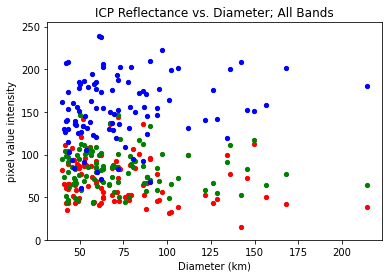

In [52]:
fig,ax = plt.subplots()

ax.scatter(icp['Diameter_k'], icp['mean1'], color='red', s=18)
ax.scatter(icp['Diameter_k'], icp['mean2'], color='green', s=18)
ax.scatter(icp['Diameter_k'], icp['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('Diameter (km)')
ax.set_title('ICP Reflectance vs. Diameter; All Bands')

#fig.savefig('icp_diameterall.png',dpi=300)

y=-0.183120x+(85.711347)
y=-0.072050x+(88.428352)
y=0.239767x+(135.011759)


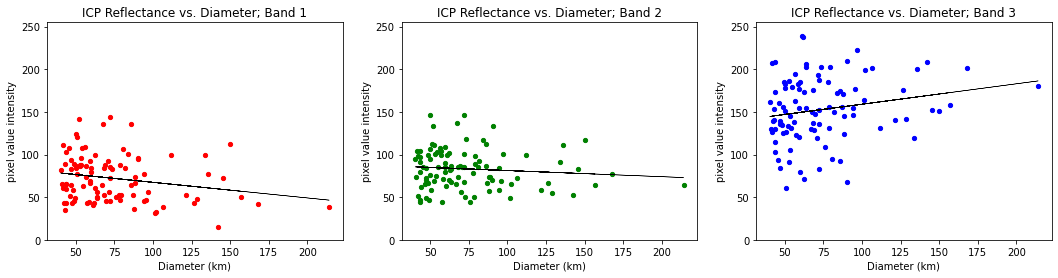

In [53]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(icp['Diameter_k'], icp['mean1'], color='red', s=18)
ax[1].scatter(icp['Diameter_k'], icp['mean2'], color='green', s=18)
ax[2].scatter(icp['Diameter_k'], icp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Diameter (km)')
ax[0].set_title('ICP Reflectance vs. Diameter; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Diameter (km)')
ax[1].set_title('ICP Reflectance vs. Diameter; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Diameter (km)')
ax[2].set_title('ICP Reflectance vs. Diameter; Band 3')

z = np.polyfit(icp['Diameter_k'], icp['mean1'], 1)
p = np.poly1d(z)
ax[0].plot(icp['Diameter_k'],p(icp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['Diameter_k'], icp['mean2'], 1)
p = np.poly1d(z)
ax[1].plot(icp['Diameter_k'],p(icp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

z = np.polyfit(icp['Diameter_k'], icp['mean3'], 1)
p = np.poly1d(z)
ax[2].plot(icp['Diameter_k'],p(icp['Diameter_k']),"k", lw=.5)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#fig.savefig('icp_diameter3.png',dpi=300)

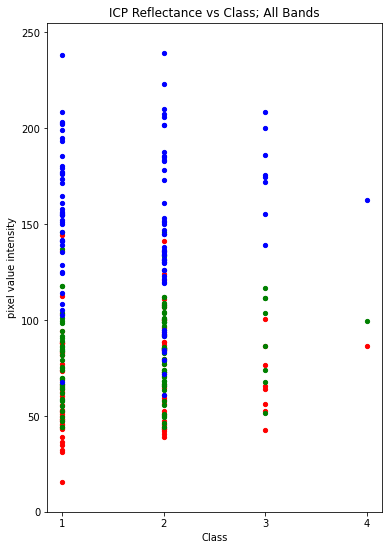

In [54]:
fig,ax = plt.subplots(figsize=(6,9))

ax.scatter(icp['Class'], icp['mean1'], color='red', s=18)
ax.scatter(icp['Class'], icp['mean2'], color='green', s=18)
ax.scatter(icp['Class'], icp['mean3'], color='blue', s=18)

ax.set_ylim(0,255)

ax.set_ylabel('pixel value intensity')
ax.set_xlabel('Class')
ax.set_title('ICP Reflectance vs Class; All Bands')

ax.set_xticks([1, 2, 3, 4])

fig.savefig('icp_classall.png',dpi=300)

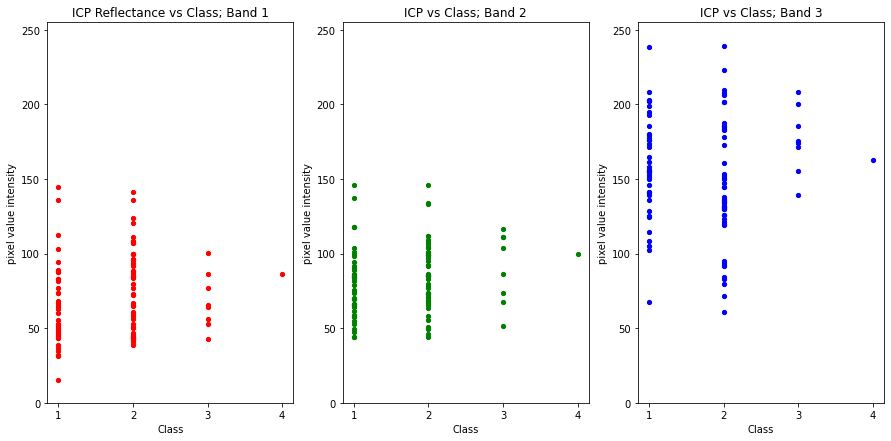

In [55]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].scatter(icp['Class'], icp['mean1'], color='red', s=18)
ax[1].scatter(icp['Class'], icp['mean2'], color='green', s=18)
ax[2].scatter(icp['Class'], icp['mean3'], color='blue', s=18)

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('ICP Reflectance vs Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('ICP vs Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('ICP vs Class; Band 3')

ax[0].set_xticks([1, 2, 3, 4])
ax[1].set_xticks([1, 2, 3, 4])
ax[2].set_xticks([1, 2, 3, 4])

fig.savefig('icp_class3.png',dpi=300)

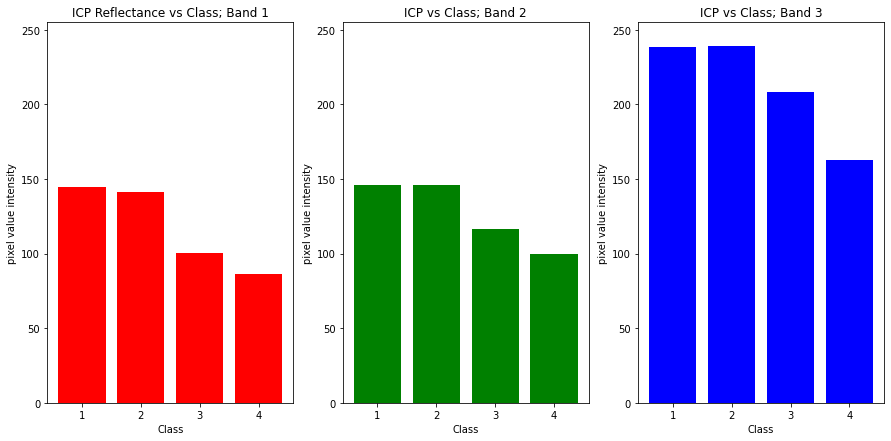

In [56]:
fig,ax = plt.subplots(1,3, figsize=(15,7))

ax[0].bar(icp['Class'], icp['mean1'], color='red')
ax[1].bar(icp['Class'], icp['mean2'], color='green')
ax[2].bar(icp['Class'], icp['mean3'], color='blue')

ax[0].set_ylim(0,255)
ax[1].set_ylim(0,255)
ax[2].set_ylim(0,255)

ax[0].set_ylabel('pixel value intensity')
ax[0].set_xlabel('Class')
ax[0].set_title('ICP Reflectance vs Class; Band 1')

ax[1].set_ylabel('pixel value intensity')
ax[1].set_xlabel('Class')
ax[1].set_title('ICP vs Class; Band 2')

ax[2].set_ylabel('pixel value intensity')
ax[2].set_xlabel('Class')
ax[2].set_title('ICP vs Class; Band 3')

fig.savefig('icp_classmean.png',dpi=300)